In [1]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from ast import literal_eval

In [2]:
url = "https://raw.githubusercontent.com/kiang/pharmacies/master/json/points.json"
response = urllib.request.urlopen(url)
jsondata = json.loads(response.read())
df=pd.json_normalize(jsondata['features'])
print(df)

         type properties.id   properties.name properties.phone  \
0     Feature    5935021323            國豐藥師藥局           866516   
1     Feature    5901173701            壹間藥師藥局         27672833   
2     Feature    5931022806            聯鑫藥師藥局         89829880   
3     Feature    5932052808              柏霖藥局          2120284   
4     Feature    5939012222             啄木鳥藥局          5344030   
...       ...           ...               ...              ...   
6087  Feature    2101090011          大同健康服務中心     (02)25948971   
6088  Feature    2101200017      政大(文山健康服務中心)     (02)22343501   
6089  Feature    0291010010            連江縣立醫院      (083)623995   
6090  Feature    5907380353       桂林活力藥師藥局漢民店      (07)8010636   
6091  Feature    0145080011  衛生福利部花蓮醫院豐濱原住民分院      (03)8358141   

           properties.address  properties.mask_adult  properties.mask_child  \
0          苗栗縣苑裡鎮苑北里２鄰天下路１８６號                   3166                    205   
1           臺北市信義區虎林街１２０巷１４８號                   6

In [3]:
df.describe()

,properties.mask_adult,properties.mask_child
count,6092.000000,6092.000000
mean,4256.537262,217.164314
std,1963.561545,255.213153
min,0.000000,0.000000
25%,3264.000000,14.750000
50%,4338.000000,160.000000
75%,5447.250000,326.000000
max,32058.000000,2655.000000


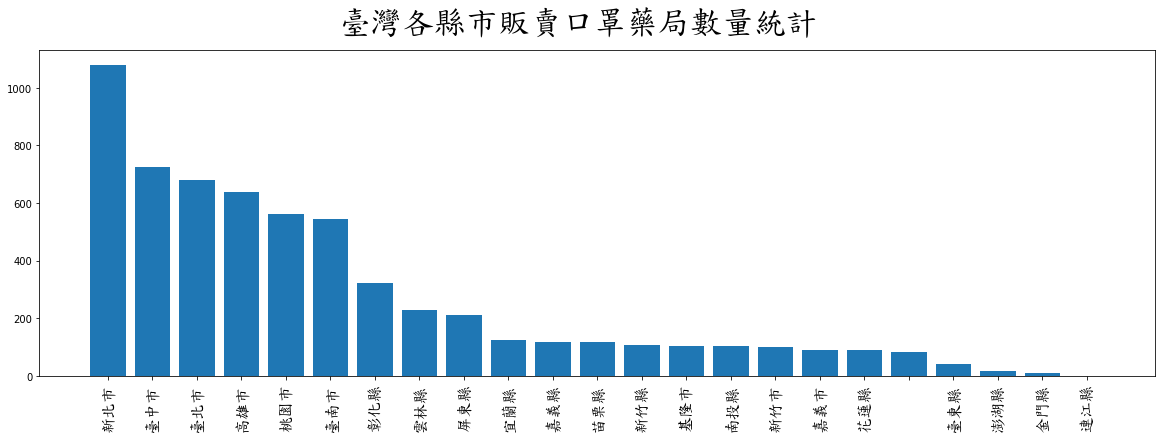

In [5]:
#-*-coding:utf-8-*-
#按照縣市區分

a1f=df.groupby('properties.county').count().sort_values(by='type',ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺灣各縣市販賣口罩藥局數量統計', fontproperties=font, fontsize=32)
#plt.rcParams['font.family']="Arial"
plt.bar(a1f.index,a1f['type'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

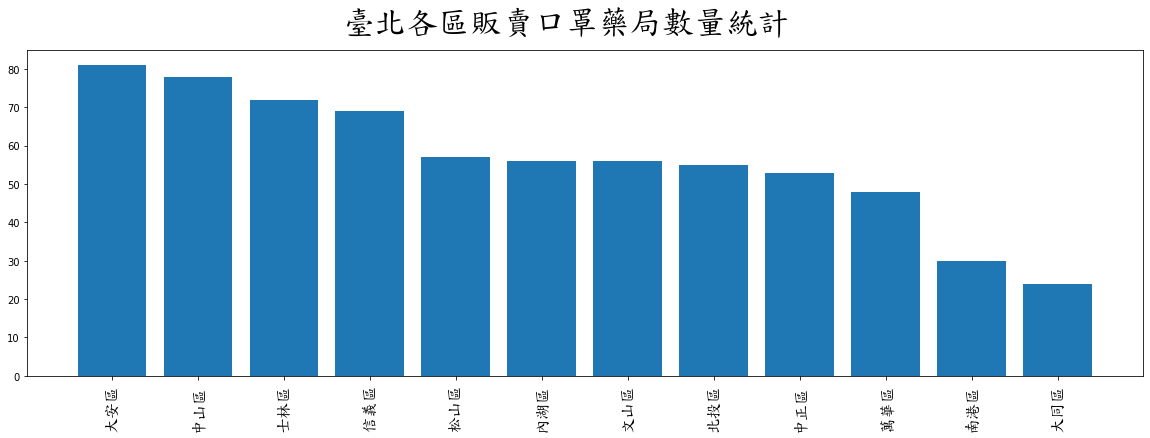

In [6]:
#-*-coding:utf-8-*-
#按照臺北市各區區分
a1f=df[df['properties.county']=="臺北市"].groupby('properties.town').count().sort_values(by='type',ascending=False).head(50)

fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('臺北各區販賣口罩藥局數量統計', fontproperties=font, fontsize=32)
font = fm.FontProperties(fname='./font/KaiTi.ttc') 
#plt.rcParams['font.family']="Arial"
plt.bar(a1f.index,a1f['type'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

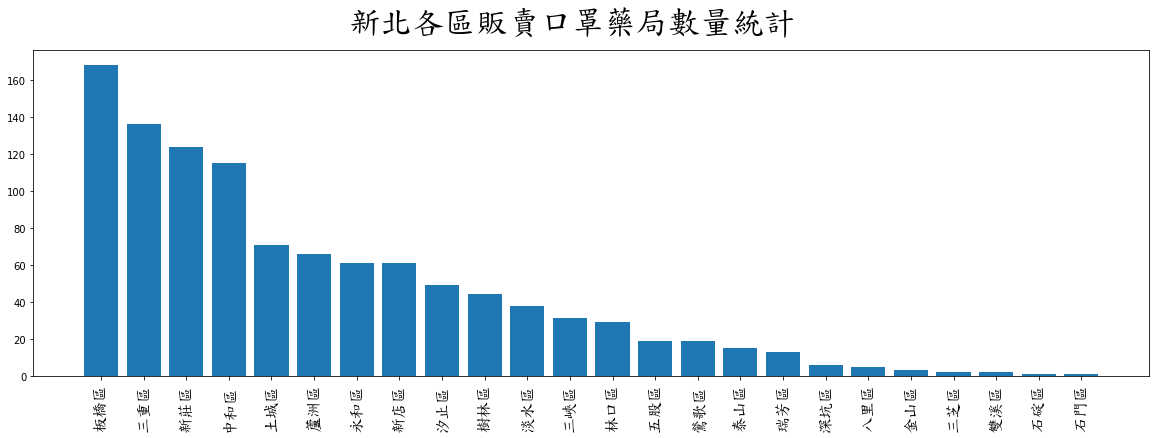

In [7]:
#-*-coding:utf-8-*-
#按照新北市各區區分
a1f=df[df['properties.county']=="新北市"].groupby('properties.town').count().sort_values(by='type',ascending=False).head(50)

fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('新北各區販賣口罩藥局數量統計', fontproperties=font, fontsize=32)
font = fm.FontProperties(fname='./font/KaiTi.ttc') 
#plt.rcParams['font.family']="Arial"
plt.bar(a1f.index,a1f['type'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

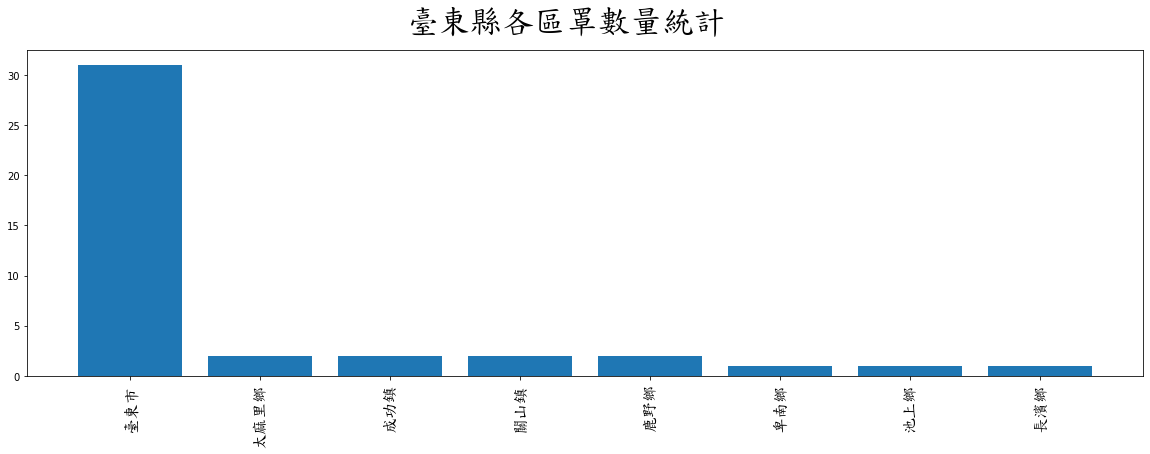

In [8]:
#-*-coding:utf-8-*-
#按照臺東縣各區區分

a1f=df[df['properties.county']=="臺東縣"].groupby('properties.town').count().sort_values(by='type',ascending=False).head(50)

fig, ax = plt.subplots(figsize=(20, 6))
font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺東縣各區罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['type'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

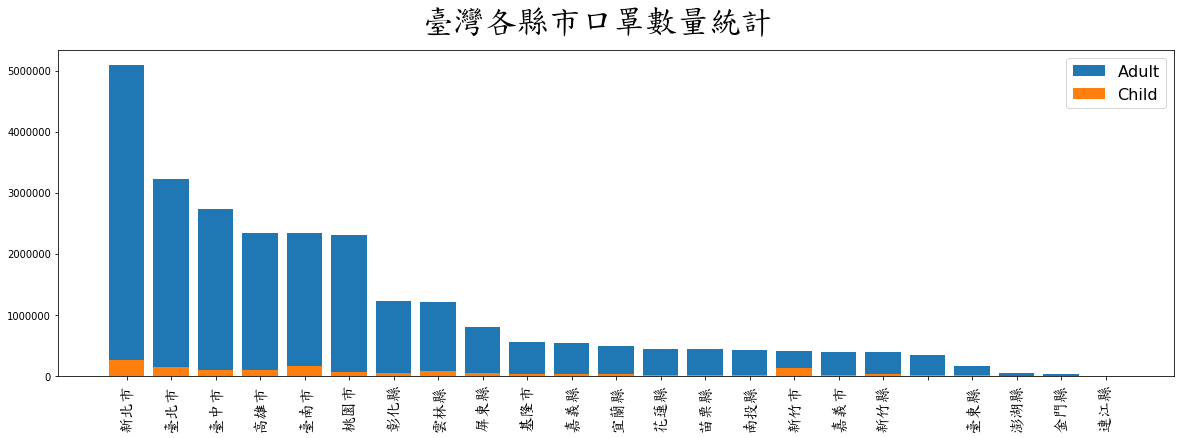

In [9]:
#-*-coding:utf-8-*-

a1f=df.groupby('properties.county').sum().sort_values(by='properties.mask_adult',ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺灣各縣市口罩數量統計', fontproperties=font, fontsize=32)

plt.bar(a1f.index,a1f['properties.mask_adult'],label="Adult")
plt.bar(a1f.index,a1f['properties.mask_child'],label="Child")
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.legend(fontsize=16)
plt.show()

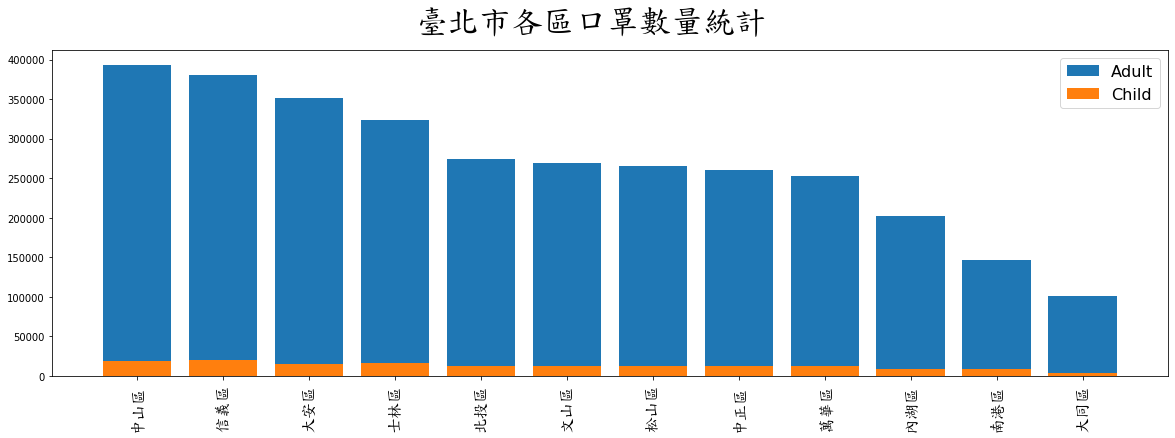

In [10]:
#-*-coding:utf-8-*-
#按照臺北市各區區分
a1f=df[df['properties.county']=="臺北市"].groupby('properties.town').sum().sort_values(by='properties.mask_adult',ascending=False).head(50)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺北市各區口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'],label="Adult")
plt.bar(a1f.index,a1f['properties.mask_child'],label="Child")
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.legend(fontsize=16)
plt.show()

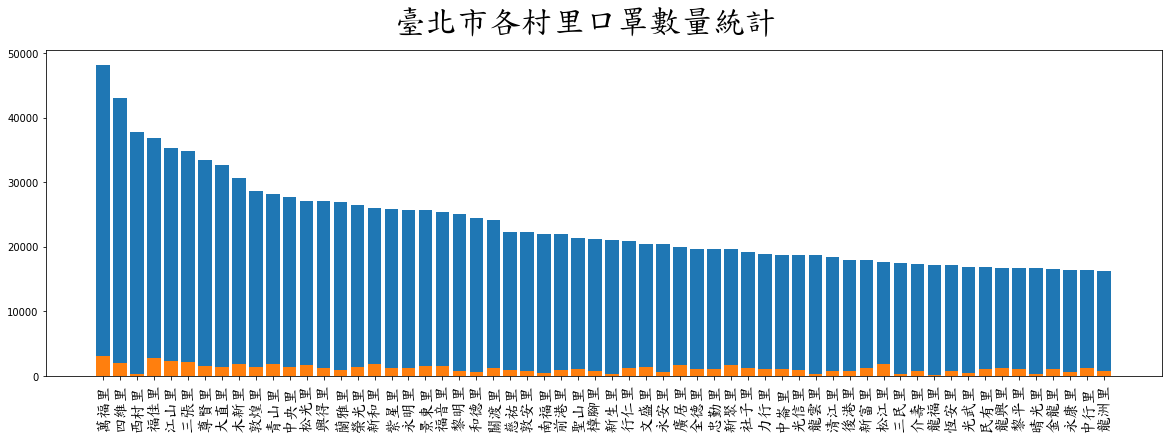

In [11]:
#-*-coding:utf-8-*-
#按照臺北市各區區分
a1f=df[df['properties.county']=="臺北市"].groupby('properties.cunli').sum().sort_values(by='properties.mask_adult',ascending=False).head(60)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺北市各村里口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'])
plt.bar(a1f.index,a1f['properties.mask_child'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

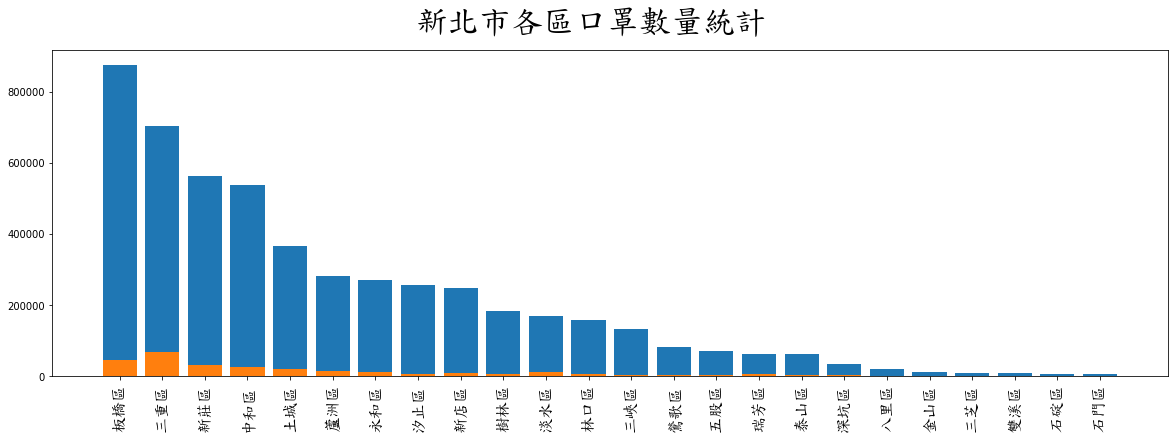

In [12]:
#-*-coding:utf-8-*-
#按照新北市各區區分
a1f=df[df['properties.county']=="新北市"].groupby('properties.town').sum().sort_values(by='properties.mask_adult',ascending=False).head(50)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('新北市各區口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'])
plt.bar(a1f.index,a1f['properties.mask_child'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

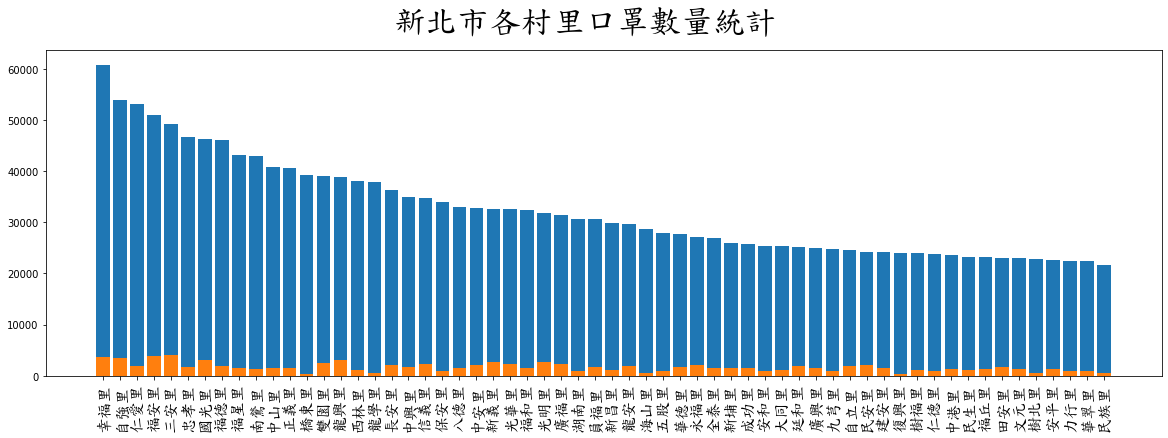

In [13]:
#-*-coding:utf-8-*-
#按照新北市各區區分
a1f=df[df['properties.county']=="新北市"].groupby('properties.cunli').sum().sort_values(by='properties.mask_adult',ascending=False).head(60)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('新北市各村里口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'])
plt.bar(a1f.index,a1f['properties.mask_child'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

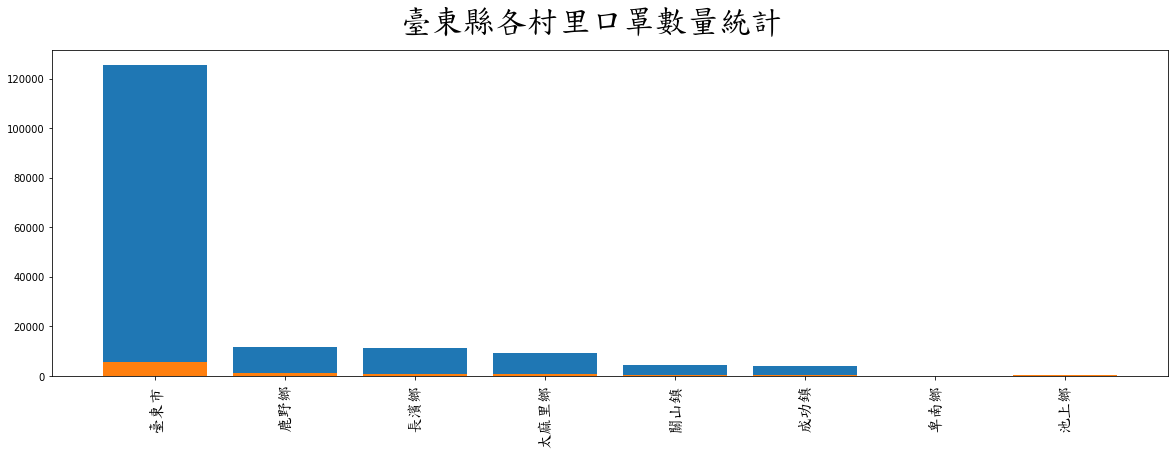

In [14]:
#-*-coding:utf-8-*-
#按照臺東縣各區區分
a1f=df[df['properties.county']=="臺東縣"].groupby('properties.town').sum().sort_values(by='properties.mask_adult',ascending=False).head(60)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺東縣各村里口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'])
plt.bar(a1f.index,a1f['properties.mask_child'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

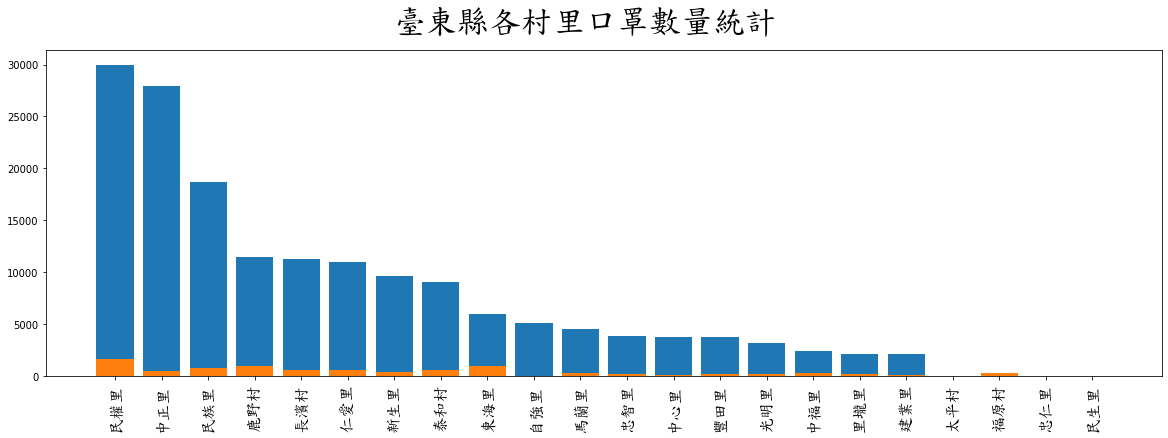

In [15]:
#-*-coding:utf-8-*-
#按照臺東縣各村里區分
a1f=df[df['properties.county']=="臺東縣"].groupby('properties.cunli').sum().sort_values(by='properties.mask_adult',ascending=False).head(60)


fig, ax = plt.subplots(figsize=(20, 6))

font = fm.FontProperties(fname='./font/KaiTi.ttc') 
fig.suptitle('臺東縣各村里口罩數量統計', fontproperties=font, fontsize=32)
plt.bar(a1f.index,a1f['properties.mask_adult'])
plt.bar(a1f.index,a1f['properties.mask_child'])
plt.xticks(rotation=90)
ax.set_xticklabels(a1f.index, fontproperties=font,fontsize=16)
plt.show()

25.042133


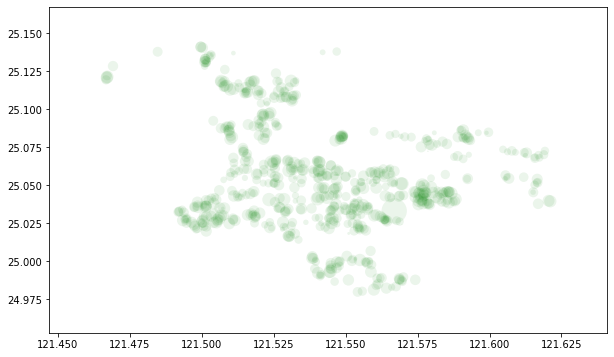

In [16]:
#-*-coding:utf-8-*-
#按照臺北口罩藥局分佈
a1f=df[df['properties.county']=="臺北市"]
print(a1f['geometry.coordinates'].values[0][1])
a2f=a1f['geometry.coordinates']
Lat=[]
Lon=[]
for x in a2f.values:
    Lat.append(x[0])
    Lon.append(x[1])

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(Lat, Lon,s=a1f['properties.mask_adult']/50, alpha=0.08,color="green",edgecolors='none')
plt.show()

In [17]:
from ipyleaflet import *

In [42]:
pd.options.mode.chained_assignment = None

a1f=df[df['properties.county']=="新北市"]
print(a1f['geometry.coordinates'].values[0][1])
a2f=a1f['geometry.coordinates']
Lat=[]
Lon=[]
for x in a2f.values:
    Lat.append(x[0])
    Lon.append(x[1])
a1f['Lat']=Lat
a1f['Lon']=Lon

25.070046


In [45]:
#-*-coding:utf-8-*-
#按照臺北口罩藥局分佈
m = Map(
    basemap=basemaps.OpenStreetMap.BlackAndWhite,
    center=(25.020482, 121.532005),
    zoom=12,
    dragging=True
)
heat_locations=[]
for index,row in a1f.iterrows():
    #circle = Circle()
    #circle.location = (row['Lon'], row['Lat'])
    #circle.radius = int(row['properties.mask_adult']/50)
    #circle.fill_color = "yellow"
    #circle.color="yellow"
    #circle.stroke=True
    #circle.opacity=0.5
    heat_locations.append([row['Lon'],row['Lat'],row['properties.mask_adult']])
    #m.add_layer(circle)
    
heatmap = Heatmap(
    locations=heat_locations,
    radius=8
)

m.add_layer(heatmap);
m

Map(center=[25.020482, 121.532005], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [35]:
pd.options.mode.chained_assignment = None

a1f=df
print(a1f['geometry.coordinates'].values[0][1])
a2f=a1f['geometry.coordinates']
Lat=[]
Lon=[]
for x in a2f.values:
    Lat.append(x[0])
    Lon.append(x[1])
a1f['Lat']=Lat
a1f['Lon']=Lon
m = Map(
    basemap=basemaps.OpenStreetMap.BlackAndWhite,
    center=(23.504413, 120.974295),
    zoom=9,
    dragging=True
)
heat_locations=[]
for index,row in a1f.iterrows():
    heat_locations.append([row['Lon'],row['Lat'],row['properties.mask_adult']])
    
heatmap = Heatmap(
    locations=heat_locations,
    radius=8
)

m.add_layer(heatmap);
m

24.446119


Map(center=[23.504413, 120.974295], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [20]:
import seaborn as sns

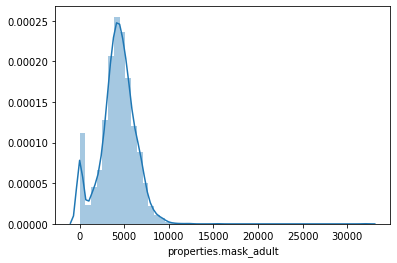

In [21]:
sns.distplot(df['properties.mask_adult']);

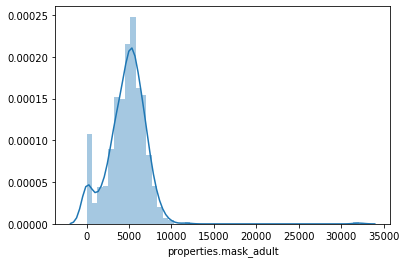

In [22]:
a1f=df[df['properties.county']=="臺北市"]
sns.distplot(a1f['properties.mask_adult']);

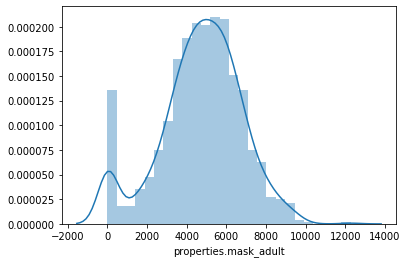

In [23]:
a1f=df[df['properties.county']=="新北市"]
sns.distplot(a1f['properties.mask_adult']);

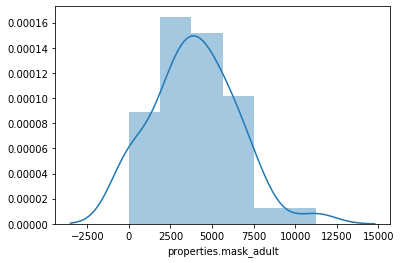

In [24]:
a1f=df[df['properties.county']=="臺東縣"]
font = fm.FontProperties(fname='./font/KaiTi.ttc') 
sns.distplot(a1f['properties.mask_adult'])

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);